# LVG geometry

Consider a source with a radial velocity gradient. If the gradient is sufficiently large, then line photons produced anywhere in the source can escape, unless absorbed locally. The reason is that all regions of the source except the local neighbourhood of the photon are at a different velocity. This local neighbourhood is also called the *radiatively connected region*. See e.g. [Elitzur (1992)](https://ui.adsabs.harvard.edu/abs/1992ASSL..170.....E/abstract) for more details.

For the two LVG geometries (sphere and slab) supported by `pythonradex`, the interpretation of the line width parameter is different compared to the static geometries. For the latter, the parameter `width_v` is the width of the intrinsic emission profile. For the LVG geometries, `width_v` corresponds to the total velocity width of the source. Thus, for a sphere, width_v=2V, where V is the velocity at the surface of the sphere.  In terms of the constant velocity gradient dv/dr=V/R (with R the radius of the sphere), we can also say that width_v=dv/dr*2*R. For the LVG slab, width_v=dv/dz*Z where Z is the depth of the slab and dv/dz the constant velocity gradient in the slab.

Note also that for LVG geometries, the only `line_profile_type` allowed is 'rectangular'. This corresponds to the emission profile of a radiatively connected region. Furthermore, dust effects cannot be included for LVG geometries in the current version of `pythonradex`.

First, let's consider the simpler case of an LVG *slab*:

In [1]:
from pythonradex import radiative_transfer
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

datafilepath = "./co.dat"  # file downloaded from EMAA or LAMDA database
# note that only a rectangular profile is allowed for LVG geometries.
# This is the shape of the emission profile of a radiatively connected
# region of the source.
line_profile_type = "rectangular"
width_v = 1 * constants.kilo
source = radiative_transfer.Source(
    datafilepath=datafilepath,
    geometry="LVG slab",
    line_profile_type=line_profile_type,
    width_v=width_v,
)

In [2]:
N = 1e16 / constants.centi**2  # column density
Tkin = 120  # kinetic temperature in [K]
collider_densities = {
    "para-H2": 2e2 / constants.centi**3,
    "ortho-H2": 6e2 / constants.centi**3,
}
ext_background = 0
# dust is not allowed for LVG geometries, so need to put dust parameters to 0:
T_dust = 0
tau_dust = 0
source.update_parameters(
    N=N,
    Tkin=Tkin,
    collider_densities=collider_densities,
    ext_background=ext_background,
    T_dust=T_dust,
    tau_dust=tau_dust,
)
source.solve_radiative_transfer()

Check the spectrum:

/home/gianni/science/projects/code/pythonradex_joss/pythonradex/src/pythonradex/intensity.py:200: RuntimeWarning: invalid value encountered in divide
  S_tot = np.where(self.tau_nu_tot == 0, 0, S_nu / self.tau_nu_tot)


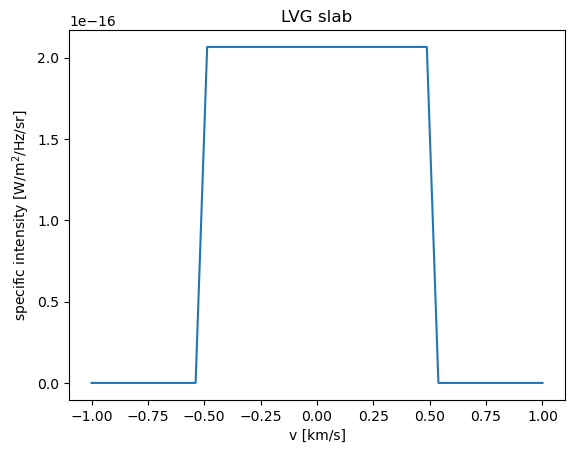

In [3]:
v = np.linspace(-width_v, width_v, 40)
nu0_21 = source.emitting_molecule.nu0[1]  # rest frequency of CO 2-1
nu = nu0_21 * (1 - v / constants.c)
slab_spectrum = source.spectrum(output_type="specific intensity", nu=nu)


def plot_spectrum(spectrum, title):
    fig, ax = plt.subplots()
    ax.plot(v / constants.kilo, spectrum)
    ax.set_title(title)
    ax.set_ylabel(r"specific intensity [W/m$^2$/Hz/sr]")
    ax.set_xlabel("v [km/s]")


plot_spectrum(spectrum=slab_spectrum, title="LVG slab")

As expected, the spectrum is a rectangle with the width corresponding to the total velocity width of the source. Now let's do the same exercise for an LVG *sphere*:

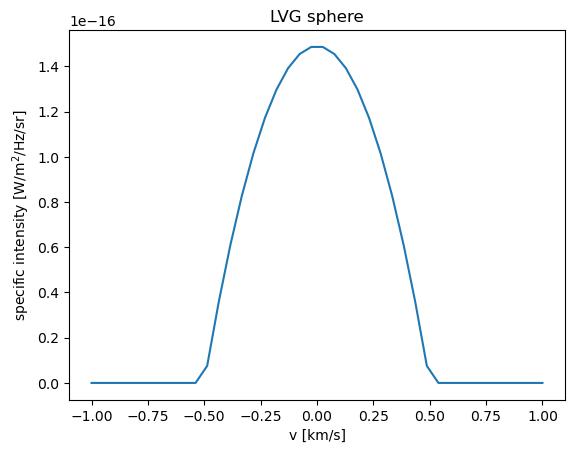

In [4]:
source = radiative_transfer.Source(
    datafilepath=datafilepath,
    geometry="LVG sphere",
    line_profile_type=line_profile_type,
    width_v=width_v,
)
source.update_parameters(
    N=N,
    Tkin=Tkin,
    collider_densities=collider_densities,
    ext_background=ext_background,
    T_dust=T_dust,
    tau_dust=tau_dust,
)
source.solve_radiative_transfer()
sphere_spectrum = source.spectrum(output_type="specific intensity", nu=nu)
plot_spectrum(spectrum=sphere_spectrum, title="LVG sphere")

We see that for a sphere, because of projection effects, the total spectrum is *not* rectangular (although the emission profile within each radiatively connected region of the sphere is rectangular).